In [142]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import os

In [281]:
# make maps folder
for dirs in ['maps', 'maps/statemaps', 'maps/allstates']:
    try:
        os.mkdir(dirs)
    except:
        print("{} folder already exists".format(dirs))

maps folder already exists
maps/allstates folder already exists


In [144]:
# import map shapefile
map_df = gpd.read_file("../../Data/StateShapeFiles/historicalcounties")

map_df.rename(columns = {'NHGISNAM':'county'}, inplace = True)
map_df.rename(columns = {'STATENAM':'state'}, inplace = True)

map_df.head()

,ID,ID2,OBJECTID,GISJOIN,DECADE,county,NHGISST,NHGISCTY,ICPSRST,ICPSRCTY,ICPSRNAM,state,SHAPE_AREA,SHAPE_LEN,AreaI,Geo_FIPS,geometry
0,11643,59420,1,0900010,1790,Fairfield,090,0010,1,10,FAIRFIELD,Connecticut,1.673889e+09,411293.875529,1.673889e+09,0900010,"MULTIPOLYGON (((-73.71277 41.10770, -73.71157 ..."
1,11644,59421,2,0900030,1790,Hartford,090,0030,1,30,HARTFORD,Connecticut,1.858418e+09,197092.380518,1.858419e+09,0900030,"POLYGON ((-72.99955 41.80002, -72.99752 41.800..."
2,11645,59422,3,0900050,1790,Litchfield,090,0050,1,50,LITCHFIELD,Connecticut,2.656161e+09,236932.296583,2.656167e+09,0900050,"POLYGON ((-73.51778 41.67084, -73.51776 41.671..."
3,11646,59423,165,0900070,1790,Middlesex,090,0070,1,70,MIDDLESEX,Connecticut,9.325004e+08,199607.085852,9.325065e+08,0900070,"MULTIPOLYGON (((-72.74954 41.59314, -72.74564 ..."
4,11647,59424,4,0900090,1790,New Haven,090,0090,1,90,NEW HAVEN,Connecticut,1.528738e+09,312354.008005,1.528726e+09,0900090,"MULTIPOLYGON (((-73.16029 41.43809, -73.16055 ..."


<AxesSubplot:>

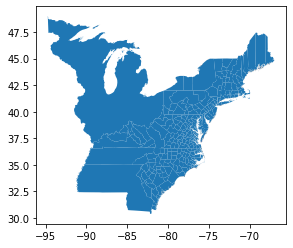

In [145]:
map_df.plot()

In [146]:
# import debt file
df = pd.read_csv("../../Data/AssetGeography/county_debt_total.csv", header=0, index_col = 0)
df['county'] = df['county'].str.replace(" County","")
states = {"Connecticut": "CT","Delaware": "DE","Georgia": "GA", "Maryland": "MD", "Massachusetts": "MA",
          "New Hampshire": "NH", "New Jersey": "NJ", "New York": "NY","North Carolina": "NC",
          "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC", "Virginia": "VA", }

map_df['state'] = map_df['state'].replace(states)

In [194]:
#merge data and map data
merged = pd.merge(map_df, df, on=['county', 'state'], how='left')
merged['6p_total'] = merged['6p_total'].fillna(0)
merged[['mean_6p_held', 'debt_per_capita', 'debt_per_white_male']] = merged[['mean_6p_held', 'debt_per_capita', 'debt_per_white_male']].fillna(0)

In [279]:
def plotState(state, variable = '6p_total'):
    if state not in states.values():
        print("{} is not a valid state".format(state))
        return
    fig, ax = plt.subplots(1, figsize=(20, 12))
    ax.axis('off')

    # get data for particular state
    state_df = merged[merged['state'] == state]

    state_max = state_df[variable].max()
    merged[merged['state'] == state].apply(lambda merged: ax.annotate(text=merged['county'], fontsize = 7, xy=merged['geometry'].centroid.coords[0], ha='center'), axis=1)

    # colorbar
    sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=state_max))
    sm._A = []
    cbar = fig.colorbar(sm)
    if variable == "6p_total":
        label = '6% Debt Coupon Stock ($)'
    if variable == "mean_6p_held":
        label = 'Mean 6% Debt Coupon Stock ($ per Debtholder)'
    if variable == "debt_per_capita":
        label = '6% Debt per Capita Coupon Stock ($ per Individual)'
    if variable == "debt_per_white_male":
        label = '6% Debt per White Male Coupon Stock ($ per White Male)'
    cbar.set_label(label)
    # colormap
    cmap = plt.get_cmap('YlOrRd').copy()
    cmap.set_under('white')
    cmap.set_over('blue')

    merged[merged['state'] == state].plot(column=variable, cmap= cmap, linewidth=0.8, ax=ax, edgecolor='0.8', vmin=.01, vmax = state_max)
    ax.set_title("Map of Continental Debt () Across Counties in {}".format(label, state))
    for dirs in ['maps/statemaps/'+variable]:
        try:
            os.mkdir(dirs)
        except:
            print("{} folder already exists".format(dirs))

    fig.savefig('{}/{}_{}_map.png'.format(dirs,state, variable))

In [283]:
# debt for 6p total
"""for state in states.values():
    plotState(state)"""

'for state in states.values():\n    plotState(state)'

In [285]:
# debt for mean 6p
"""for state in states.values():
    plotState(state, "mean_6p_held")"""

'for state in states.values():\n    plotState(state, "mean_6p_held")'

In [287]:
# debt for 6p per capita
"""for state in states.values():
    plotState(state, "debt_per_capita")"""

'for state in states.values():\n    plotState(state, "debt_per_capita")'

In [290]:
# debt for 6p per white male
"""for state in states.values():
    plotState(state, "debt_per_white_male")"""

'for state in states.values():\n    plotState(state, "debt_per_white_male")'

In [274]:
def plotAllStates(variable, maxthres):
    fig, ax = plt.subplots(1, figsize=(20, 12))

    vmin, vmax = 0.01, maxthres
    cmap = plt.get_cmap('YlOrRd').copy()
    cmap.set_under('white')
    cmap.set_over('blue')

    sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm)
    if variable == "6p_total":
        label = '6% Debt Coupon Stock ($)'
    if variable == "mean_6p_held":
        label = 'Mean 6% Debt Coupon Stock ($ per Debtholder)'
    if variable == "debt_per_capita":
        label = '6% Debt per Capita Coupon Stock ($ per Individual)'
    if variable == "debt_per_white_male":
        label = '6% Debt per White Male Coupon Stock ($ per White Male)'
    cbar.set_label(label)

    merged.plot(column=variable, cmap= cmap, linewidth=0.8, ax=ax, edgecolor='0.8', vmin=vmin, vmax = vmax)

    ax.axis('off')
    ax.set_title("Map of Continental Debt () Across All States".format(label))


    fig.savefig('maps/allstates/{}_map.png'.format(variable))
    merged.sort_values(variable, ascending = False)[['county', 'state', variable]].to_csv("maps/allstates/overthres_{}_{}.csv".format(maxthres, variable))

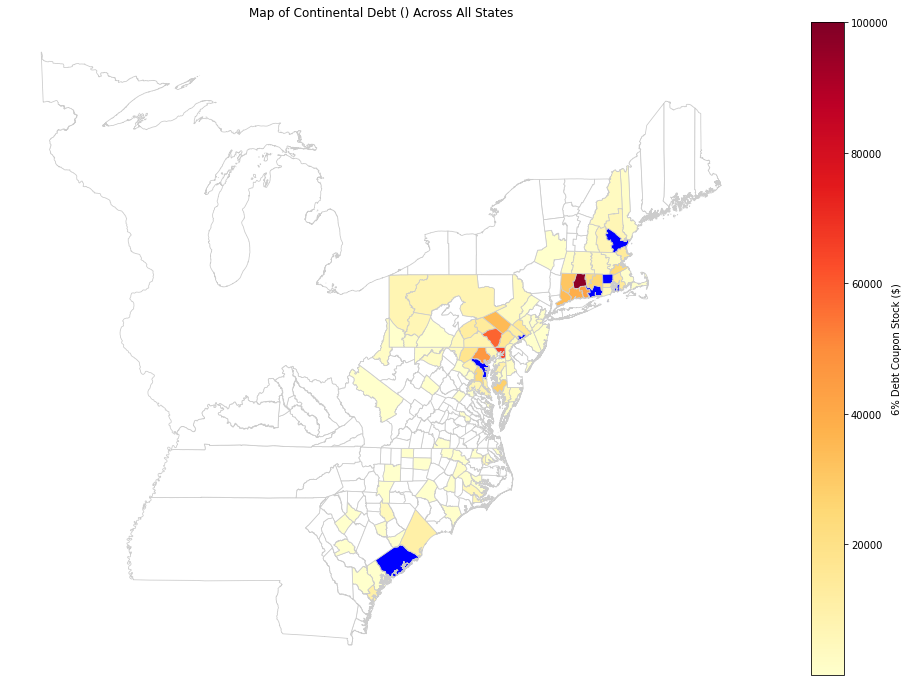

In [275]:
plotAllStates('6p_total', 100000)

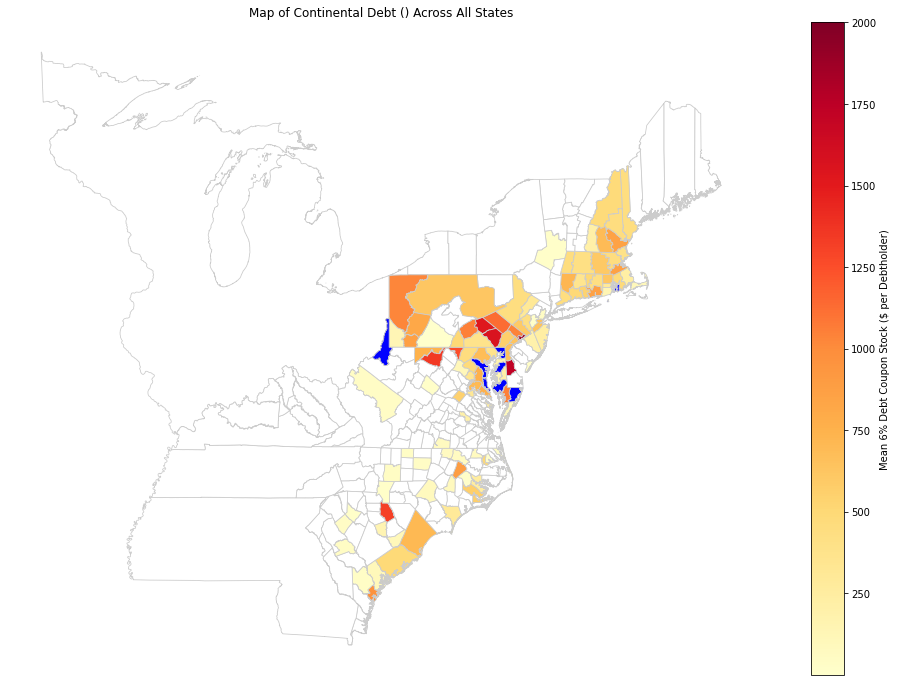

In [276]:
plotAllStates('mean_6p_held', 2000)

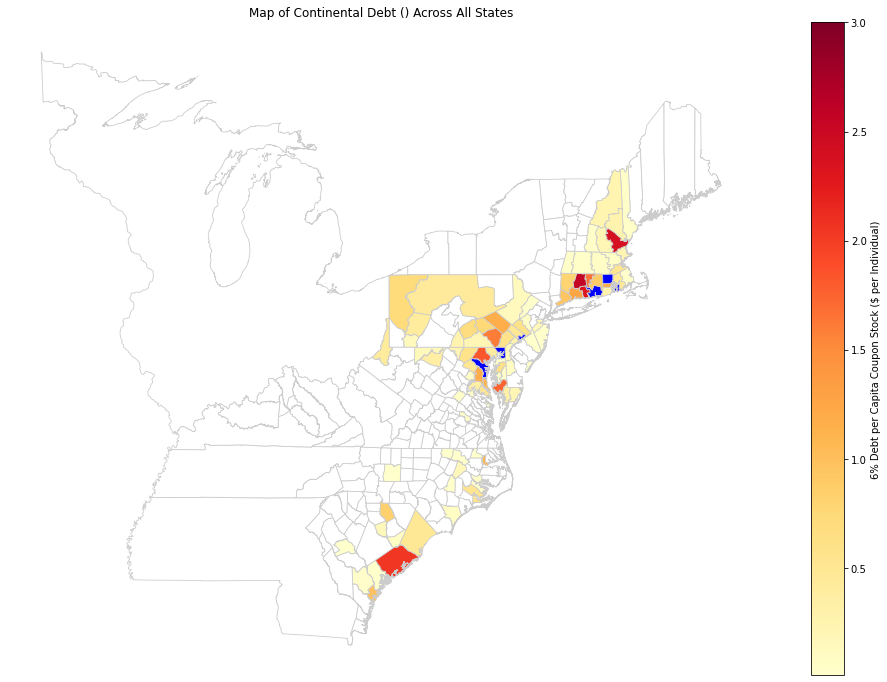

In [277]:
plotAllStates('debt_per_capita', 3)

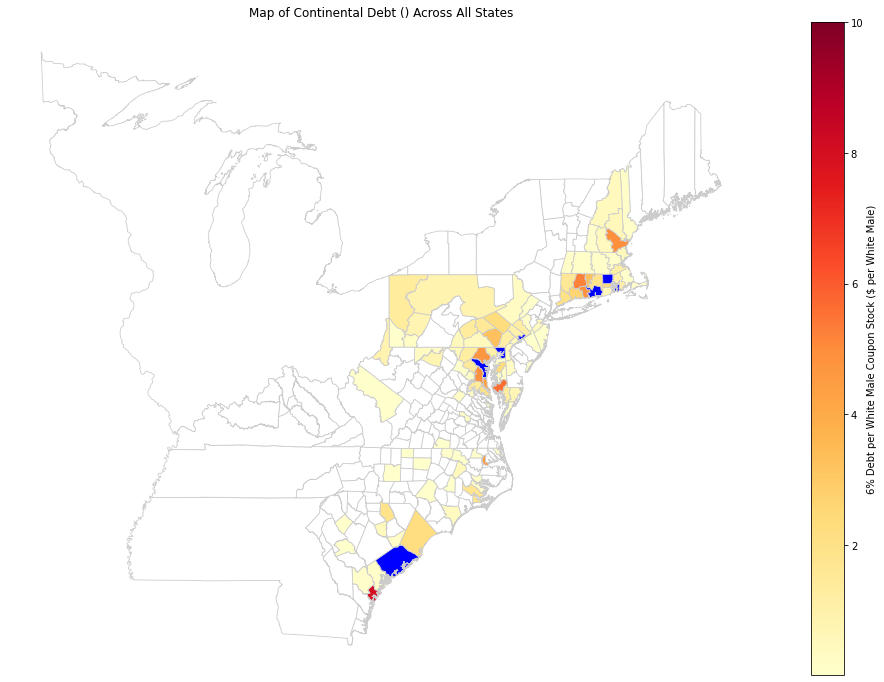

In [278]:
plotAllStates('debt_per_white_male', 10)